![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM3 - MI2
# TD 2 - Théorème de Cauchy-Lipschitz

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.polytech.unice.fr%2FMAM%2Fmi2.git/master?urlpath=lab/tree/td2/td2.ipynb)

Soit $f:\Omega \subset \mathbf{R} \times \mathbf{R}^n \to \mathbf{R}^n$, $\Omega$
ouvert, $f$ continue, et soit $(t_0,x_0) \in \Omega$. Une solution du
problème de Cauchy de second membre $f$ et de condition initiale
$(t_0,x_0)$ est un couple $(I,x)$ où $I$ est un intervalle ouvert de $\mathbf{R}$ et $x:I
\to \mathbf{R}^n$ une fonction dérivable telle que

$$ \left\{ \begin{array}{l}
  \dot{x}(t)=f(t,x(t)),\ t \in I\\
  x(t_0)=x_0.
\end{array} \right. $$

La définition précédente implique en particulier qu'une solution
$(I,x)$ est telle que $t_0 \in I$ (l'intervalle ouvert est donc non-vide),
que $(t,x(t)) \in \Omega$ quel que soit $t \in I$, et que $x \in 
\mathscr{C}^1(I,\mathbf{R}^n)$. On pourra utiliser la généralisation suivante du
théorème du point fixe.

## Exercice 1
Soit $F$ une partie fermée (et non-vide) d'un espace de Banach $E$,
et soit $g:F \to F$ telle que $g^p$ soit contractante pour un certain naturel $p$.
Montrer que $g$ possède un unique point fixe.

## Exercice 2
### 2.1
On suppose $f$ continue sur l'ouvert $\Omega$. Montrer que l'ensemble des solutions ordonné par

$$ (I,x) \leq (J,y) \iff I \subset J \text{ et } x=y_{|I} $$

et dont on admet qu'il est non-vide (Théorème de Peano : la
seule continuité de $f$ garantit l'existence de solution)
possède un élément maximal (on parle de _solution maximale_ du
problème de Cauchy).

### 2.2
On suppose désormais que $f$ est
_localement Lipschitzienne en_ $x$, _i.e._
que tout point de $\Omega$ possède un voisinage $V$ sur lequel $f$ est
Lipschitzienne en $x$ : il existe $k \geq 0$ tel que pour tous $t,x,y$ tels
que $(t,x)$ et $(t,y)$ soient dans $V$,

$$  |f(t,x)-f(t,y)| \leq k|x-y|. $$

La notation $|.|$ désigne l'une quelconque des normes
équivalentes sur $\mathbf{R}^n$.

Montrer qu'il existe un voisinage $C=B_f(t_0,\eta) \times
B_f(x_0,\varepsilon)$ (ou _cylindre de sécurité_) sur lequel $f$ est
Lipschitzienne en $x$ et tel que $\eta \sup_C |f| \leq \varepsilon$.

### 2.3
Soit $E=\mathscr{C}^0(B_f(t_0,\eta),\mathbf{R}^n)$ muni de la norme

$$ \|x\|_\infty = \sup_{B_f(t_0,\eta)} |x|, $$

soit $F \subset E$ l'ensemble des fonctions de $E$ à valeurs dans $B_f(x_0,\varepsilon)$,
et soit $\phi : F \to F$ définie par

$$ \phi(x)(t) = x_0 + \int_{t_0}^t f(s,x(s))\,\mathrm{d}s. $$

Montrer que $\phi$ possède un unique point fixe. En déduire
l'existence d'une solution pour le problème de Cauchy.

### 2.4
Montrer que le problème possède une et une seule
solution maximale (au sens de la question 2.1). Montrer que les
courbes intégrales maximales forment une partition de $\Omega$.

### 2.5. 
Discuter les trois exemples suivants : $\dot{x}(t)=x(t)$,
$\dot{x}(t)=x^2(t)$, et $\dot{x}(t)=\sqrt{|x(t)|}$.

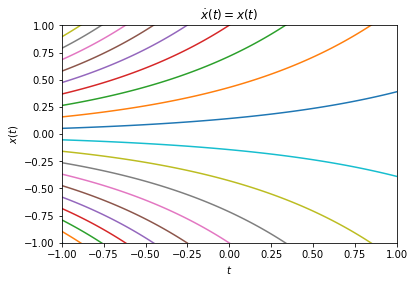

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.ion() # interactive mode on

def f1(t, x):
    """dx = f1(t, x)
      
    Second membre"""
    dx = x
    return dx

N = 20
xx0 = np.linspace(-1., 1., N)
t0 = -1.
tf = 1.
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title('$\dot{x}(t)=x(t)$')
plt.xlim(t0, tf)
plt.ylim(-1., 1.)
for x0 in np.nditer(xx0):
    M = 100
    tspan = np.linspace(t0, tf, M)
    x = odeint(lambda x, t: f1(t, x), x0, tspan)
    plt.plot(tspan, x)
plt.show()

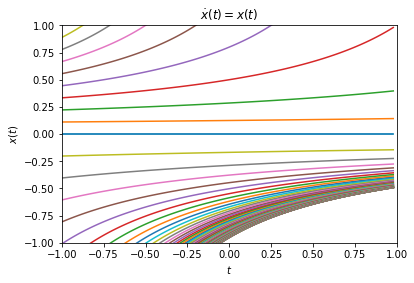

In [2]:
def f2(t, x):
    """dx = f2(t, x)
      
    Second membre"""
    dx = x**2
    return dx

N = 10
xx0 = np.hstack((np.linspace(-20., 0., 10*N), np.linspace(0., 1., N)))
t0 = -1.
tf = 1.
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.title('$\dot{x}(t)=x(t)$')
plt.xlim(t0, tf)
plt.ylim(-1., 1.)
for x0 in np.nditer(xx0):
    M = 100
    if x0 < 0.:
         tf = 1.
         tspan = np.linspace(t0, tf, M, endpoint=False)
    elif x0 > 0.:
         tf = np.amin([ 1., t0+1./x0 ])
         tspan = np.linspace(t0, tf, M, endpoint=False)
    x = odeint(lambda x, t: f2(t, x), x0, tspan)
    plt.plot(tspan, x)
plt.show()

## Exercice 3
Soit $f : I \times \mathbf{R}^n \to \mathbf{R}^n$, $I$ ouvert, $f$ continue ;
on suppose que $f$ est Lipschitzienne en $x$ sur tout $I \times \mathbf{R}^n$.

### 3.1
Montrer que le problème possède une
_solution globale_ (_i.e._ définie sur $I$ tout entier).

### 3.2
Appliquer la question précédente au problème de
Cauchy linéaire

$$ \dot{x}=A(t)x+b(t)$$

avec $A$ et $b$ continues
de $I$ dans $\mathscr{L}(\mathbf{R}^n,\mathbf{R}^n)$ et $\mathbf{R}^n$, respectivement.